<a href="https://colab.research.google.com/github/sameer-nema/Data-Analysis-Internship/blob/main/skin_cancer_4_CF_ML_models_%26_2_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os 
from glob import glob 
import seaborn as sns 
from PIL import Image 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_benign_train = '/content/drive/MyDrive/skin_cancer_dataset/data/train/benign'
folder_malignant_train = '/content/drive/MyDrive/skin_cancer_dataset/data/train/malignant'

folder_benign_test = '/content/drive/MyDrive/skin_cancer_dataset/data/test/benign'
folder_malignant_test = '/content/drive/MyDrive/skin_cancer_dataset/data/test/malignant'


In [ ]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [ ]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

In [ ]:
# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [ ]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [ ]:
# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)


In [ ]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

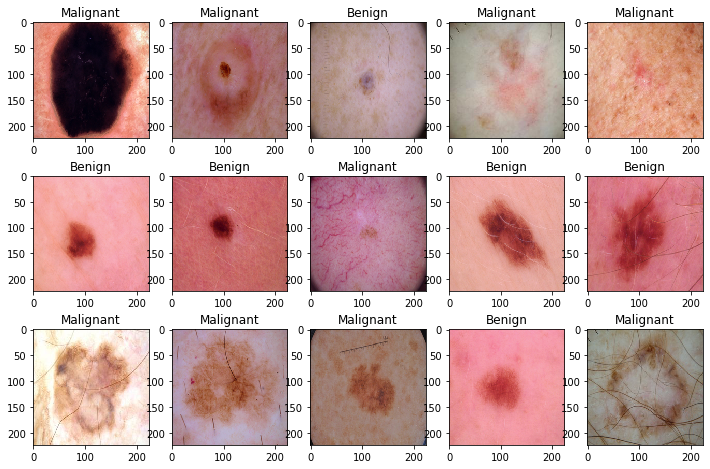

In [ ]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3 #4 optimal 
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

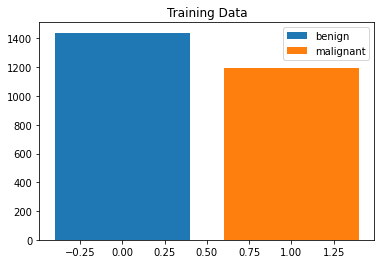

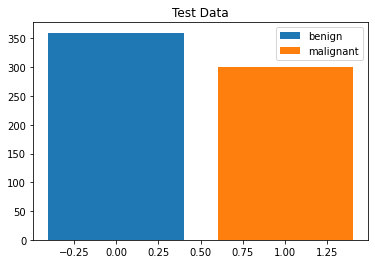

In [ ]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [ ]:
# With data augmentation to prevent overfitting 
X_train = X_train/255.
X_test = X_test/255.

# K NEAREST NEIGHBORS CLASSIFICATION



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KN = KNeighborsClassifier()
model_KN.fit(X_train.reshape(X_train.shape[0],-1), y_train)

KNeighborsClassifier()

In [ ]:
import pickle
skin_cancer_KN_cf = 'skin_cancer_KN_cf.sav'
pickle.dump(model_KN, open(skin_cancer_KN_cf, 'wb'))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_KN_cf = model_KN.predict(X_test.reshape(X_test.shape[0],-1))
print(accuracy_score(y_test, y_pred_KN_cf))
knn_acc = accuracy_score(y_test, y_pred_KN_cf)

0.7484848484848485


KNeighborsClassifier

Confusion Matrix:



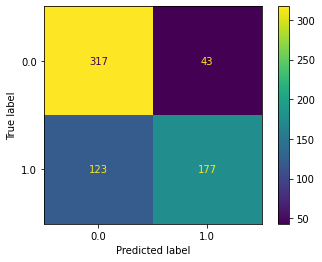


Classification Report:
              precision    recall  f1-score   support

      benign       0.72      0.88      0.79       360
   malignant       0.80      0.59      0.68       300

    accuracy                           0.75       660
   macro avg       0.76      0.74      0.74       660
weighted avg       0.76      0.75      0.74       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['benign', 'malignant']
print("KNeighborsClassifier")
print()

print("Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_KN_cf)
print()

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=model_KN.classes_) 
disp.plot()
plt.show()

print()
target_names = ['benign', 'malignant']
print("Classification Report:")
print(classification_report(y_test, y_pred_KN_cf, target_names=target_names))

# SUPPORT VECTOR CLASSIFIER

In [ ]:
# support vector machine classifier
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [ ]:
import pickle
skin_cancer_svm = 'skin_cancer_svm.sav'
pickle.dump(model_svm, open(skin_cancer_svm, 'wb'))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_svm = model_svm.predict(X_test.reshape(X_test.shape[0],-1))
print(accuracy_score(y_test, y_pred_svm))
svc_acc = accuracy_score(y_test, y_pred_svm)

0.8348484848484848


Support Vector Classifier: 

Confusion Matrix:



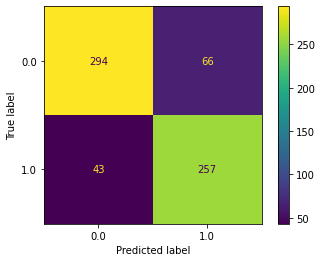


Classification Report:
              precision    recall  f1-score   support

      benign       0.87      0.82      0.84       360
   malignant       0.80      0.86      0.83       300

    accuracy                           0.83       660
   macro avg       0.83      0.84      0.83       660
weighted avg       0.84      0.83      0.84       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['benign', 'malignant']
print("Support Vector Classifier: ")
print()

print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print()

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=model_svm.classes_) 
disp.plot()
plt.show()

print()
target_names = ['benign', 'malignant']
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))


# DECISION TREE CLASSIFIER

In [ ]:
#  Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train.reshape(X_train.shape[0],-1), y_train)

DecisionTreeClassifier()

In [ ]:
import pickle
skin_cancer_dt = 'skin_cancer_dt.sav'
pickle.dump(model_dt, open(skin_cancer_dt, 'wb'))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_dt = model_dt.predict(X_test.reshape(X_test.shape[0],-1))
print(accuracy_score(y_test, y_pred_dt))
dt_acc = accuracy_score(y_test, y_pred_dt)

0.7833333333333333


Decision Tree Classifier: 

Confusion Matrix:



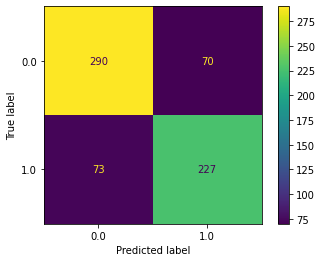


Classification Report:
              precision    recall  f1-score   support

      benign       0.80      0.81      0.80       360
   malignant       0.76      0.76      0.76       300

    accuracy                           0.78       660
   macro avg       0.78      0.78      0.78       660
weighted avg       0.78      0.78      0.78       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['benign', 'malignant']
print("Decision Tree Classifier: ")
print()

print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print()

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                              display_labels=model_dt.classes_) 
disp.plot()
plt.show()

print()
target_names = ['benign', 'malignant']
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))

# RANDOM FOREST CLASSIFIER

In [ ]:
# Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier() 
model_rf.fit(X_train.reshape(X_train.shape[0],-1), y_train)

RandomForestClassifier()

In [ ]:
import pickle
skin_cancer_rf = 'skin_cancer_rf.sav'
pickle.dump(model_rf, open(skin_cancer_rf, 'wb'))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_rf = model_rf.predict(X_test.reshape(X_test.shape[0],-1))
print(accuracy_score(y_test, y_pred_rf))
rf_acc = accuracy_score(y_test, y_pred_rf)

0.8303030303030303


Random Forest Classifier: 

Confusion Matrix:



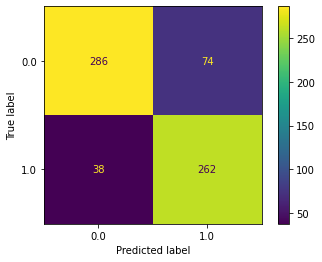


Classification Report:
              precision    recall  f1-score   support

      benign       0.88      0.79      0.84       360
   malignant       0.78      0.87      0.82       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.84      0.83      0.83       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['benign', 'malignant']
print("Random Forest Classifier: ")
print()

print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print()

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=model_dt.classes_) 
disp.plot()
plt.show()

print()
target_names = ['benign', 'malignant']
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# CUSTOM CNN

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
# from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet import ResNet50
from keras import backend as K 
from sklearn.metrics import accuracy_score

In [ ]:
y_train_onehot = to_categorical(y_train, num_classes= 2)
y_test_onehot = to_categorical(y_test, num_classes= 2)

In [ ]:
def build(input_shape = (224,224,3), lr = 1e-3, num_classes= 2,
          init= 'normal', activ= 'relu', optim= 'adam'):
  
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape,
                     activation= activ, kernel_initializer='glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', 
                     activation =activ, kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=init))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()

    if optim == 'rmsprop':
        optimizer = RMSprop(lr=lr)

    else:
        optimizer = Adam(lr=lr)

    model.compile(optimizer = optimizer ,loss = "binary_crossentropy", metrics=["accuracy"])
    return model

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7,
                                            mode='auto',
                                            # min_delta=0.01,
                                            )

In [ ]:
input_shape = (224,224,3)
lr = 1e-5
init = 'normal'
activ = 'relu'
optim = 'adam'
epochs = 50
batch_size = 64

model = build(lr=lr, init= init, activ= activ, optim=optim, input_shape= input_shape)

In [ ]:
history = model.fit(
                    X_train,
                    y_train_onehot,
                    validation_split=0.2,
                    epochs= epochs, 
                    batch_size= batch_size, 
                    verbose=1, 
                    callbacks=[learning_rate_reduction]
                    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/50
33/33 [==============================] - 35s 805ms/step - loss: 1.0479 - accuracy: 0.5287 - val_loss: 0.6847 - val_accuracy: 0.5398 - lr: 1.0000e-05
Epoch 2/50
33/33 [==============================] - 24s 730ms/step - loss: 0.8773 - accuracy: 0.5439 - val_loss: 0.6684 - val_accuracy: 0.5758 - lr: 1.0000e-05
Epoch 3/50
33/33 [==============================] - 24s 731ms/step - loss: 0.7760 - accuracy: 0.5733 - val_loss: 0.6698 - val_accuracy: 0.5341 - lr: 1.0000e-05
Epoch 4/50
33/33 [==============================] - 24s 730ms/step - loss: 0.7543 - accuracy: 0.5894 - val_loss: 0.6566 - val_accuracy: 0.5417 - lr: 1.0000e-05
Epoch 5/50
33/33 [==============================] - 24s 733ms/step - loss: 0.7073 - accuracy: 0.6178 - val_loss: 0.6490 - val_accuracy: 0.5530 - lr: 1.0000e-05
Epoch 6/50
33/33 [==============================] - 24s 730ms/step - loss: 0.6899 - accuracy: 0.6112 - val_loss: 0.6255 - val_accuracy: 0.6913 - lr: 1.0000e-05
Epoch 7/50
33/33 [======================

In [ ]:
# model.load_weights('/content/drive/MyDrive/skin_cancer_dataset/model.h5')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


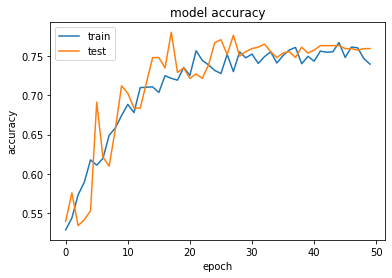

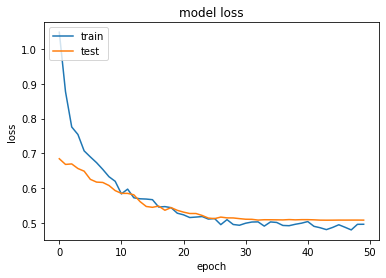

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Testing model on test data to evaluate
y_pred_custom_cnn1 = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
np.argmax(y_pred_custom_cnn1, axis=1)

In [ ]:
np.argmax(y_test_onehot, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_custom_cnn1, axis=1)))

0.75


In [ ]:
model.save('/content/drive/MyDrive/skin_cancer_dataset/custom_starter.h5')

In [ ]:
# Fitting model to all data
# model.fit(X_train, y_train_onehot,
#           epochs=epochs, batch_size= batch_size, verbose=0,
#           callbacks=[learning_rate_reduction]
#          )

# # Testing model on test data to evaluate
# y_pred_cnn1_all = model.predict(X_test)

# print(accuracy_score(np.argmax(y_test, axis=1), y_pred_cnn1_all))

Custom CNN - 1: 

Confusion Matrix:



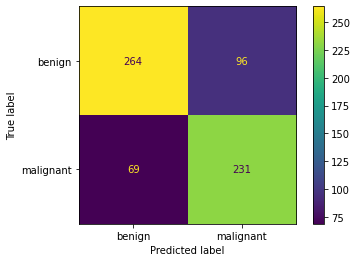


Classification Report:
              precision    recall  f1-score   support

      benign       0.79      0.73      0.76       360
   malignant       0.71      0.77      0.74       300

    accuracy                           0.75       660
   macro avg       0.75      0.75      0.75       660
weighted avg       0.75      0.75      0.75       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['benign', 'malignant']
print("Custom CNN - 1: ")
print()

print("Confusion Matrix:")
cm_cnn1 = confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_custom_cnn1, axis=1))
print()

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn1,
                              display_labels=target_names) 

disp.plot()
plt.show()

print()
target_names = ['benign', 'malignant']
print("Classification Report:")
print(classification_report(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_custom_cnn1, axis=1), target_names=target_names))

# RESNET 50

In [ ]:
input_shape = (224,224,3)
lr = 1e-5
epochs = 50
batch_size = 64

model_resnet = ResNet50(include_top=True,
                        weights= None,
                        input_tensor=None,
                        input_shape=input_shape,
                        pooling='avg',
                        classes=2)

model_resnet.compile(optimizer = Adam(lr) ,
                     loss = "binary_crossentropy", 
                     metrics=["accuracy"]) 

model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Train ResNet50 on all the data
history_resnet = model_resnet.fit(X_train,
                                  y_train_onehot,
                                  validation_split=0.2,
                                  epochs=epochs,
                                  batch_size= batch_size,
                                  verbose=1,
                                  callbacks=[learning_rate_reduction]
                                  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/50
33/33 [==============================] - 63s 2s/step - loss: 0.5855 - accuracy: 0.6894 - val_loss: 0.7304 - val_accuracy: 0.3352 - lr: 1.0000e-05
Epoch 2/50
33/33 [==============================] - 52s 2s/step - loss: 0.4695 - accuracy: 0.7705 - val_loss: 0.7445 - val_accuracy: 0.5549 - lr: 1.0000e-05
Epoch 3/50
33/33 [==============================] - 50s 2s/step - loss: 0.4269 - accuracy: 0.7828 - val_loss: 0.8563 - val_accuracy: 0.5549 - lr: 1.0000e-05
Epoch 4/50
33/33 [==============================] - 52s 2s/step - loss: 0.4108 - accuracy: 0.7923 - val_loss: 1.0229 - val_accuracy: 0.5549 - lr: 1.0000e-05
Epoch 5/50
33/33 [==============================] - 50s 2s/step - loss: 0.3865 - accuracy: 0.8122 - val_loss: 1.2842 - val_accuracy: 0.5549 - lr: 1.0000e-05
Epoch 6/50
33/33 [==============================] - 52s 2s/step - loss: 0.3733 - accuracy: 0.8241 - val_loss: 1.4340 - val_accuracy: 0.5549 - lr: 1.0000e-05
Epoch 7/50
33/33 [==============================] - ETA: 0

In [ ]:
model_resnet.save('/content/drive/MyDrive/skin_cancer_dataset/resnet50_starter.h5')

In [ ]:
# (w,h) = 224,224
# resnet_weights_path = '/content/drive/MyDrive/skin_cancer_dataset/resnet50.h5'
# base_model = ResNet50(include_top=False, weights=resnet_weights_path, input_shape=(w,h,3),pooling='avg')
# # model_resnet.load_weights('/content/drive/MyDrive/skin_cancer_dataset/resnet50.h5')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_resnet, show_shapes=True, show_layer_names=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


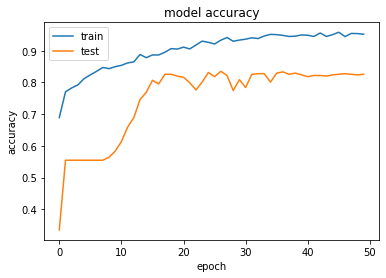

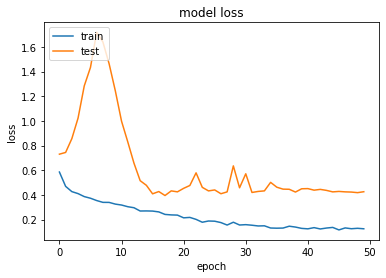

In [ ]:
# list all data in history
print(history_resnet.history.keys())
# summarize history for accuracy
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred_resnet = model_resnet.predict(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
print(accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_resnet, axis=1)))

0.8151515151515152


In [ ]:
resnet50_Acc = accuracy_score(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_resnet, axis=1))

RESNET50: 

Confusion Matrix:



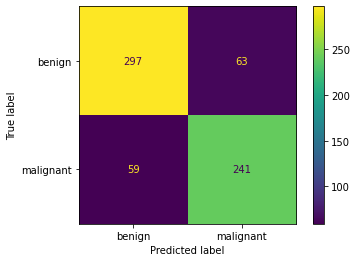


Classification Report:
              precision    recall  f1-score   support

      benign       0.83      0.82      0.83       360
   malignant       0.79      0.80      0.80       300

    accuracy                           0.82       660
   macro avg       0.81      0.81      0.81       660
weighted avg       0.82      0.82      0.82       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
target_names = ['benign', 'malignant']
print("RESNET50: ")
print()

print("Confusion Matrix:")
cm_resnet = confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_resnet, axis=1))
print()

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_resnet,
                              display_labels=target_names) 
disp.plot()
plt.show()

print()
target_names = ['benign', 'malignant']
print("Classification Report:")
print(classification_report(np.argmax(y_test_onehot, axis=1), np.argmax(y_pred_resnet, axis=1), target_names=target_names))

# CONCLUSION

In [ ]:
data = {'KNN':75, 'SVC':84, 'DecisionTree':74,
        'RandomForest':83, 'CNN-1':75, 'CNN-2':72,
        'Resnet-50':94, 'Mobile-Net':78}

models = list(data.keys())
accuracy = list(data.values())

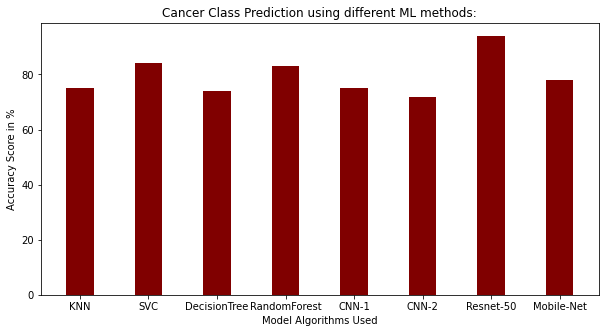

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model Algorithms Used")
plt.ylabel("Accuracy Score in %")
plt.title("Cancer Class Prediction using different ML methods:")
plt.show()